## Q1. Median Maintenance using a Heap


### Part 1

Implement a "dominant heap" class `BinaryHeap`, which can handle both the min heap and the max heap cases, by having the constructor explicitly pass the "comparison" operator in. Replace min and del_min by dominant and del_dominant methods. Change the classmethod to also take in the operator.

In [1]:
import subprocess
from IPython.display import Image
def dotify(l, fname):
    start = """
    digraph G {
    nodesep=0.3;
    ranksep=0.2;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    """
    end = "}"
    labels=dict(enumerate(l))
    for i, v in labels.items():
        if i!=0 and 2*i < len(l):
            line1 = "{} -> {}[side=left];\n".format(i, 2*i)
        else:
            line1=""
        if i!=0 and 2*i + 1 < len(l):
            line2 = "{} -> {};\n".format(i, 2*i+1)
        else:
            line2 = ""
        start = start + line1 + line2
    end = "\n".join("{}[label=\"{}\"]".format(i, labels[i]) for i in labels if i!=0) + end
    with open(fname+".dot","w") as fd:
        fd.write(start+end)
    subprocess.call(['./treeplot.sh', fname])
    
#your code here 
class BinaryHeap:
    def __init__(self,comparison):
        self.storage=[None]
        self.upto=0
        self.comparison = comparison
        
    @classmethod
    def heapify_slow(cls, it, comparison):
        inst = cls(comparison) #pass the comparison operator
        for i in it:
            inst.insert(i)
        return inst
            
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)

    def sift_up(self, i):
        parent = i // 2
        if parent > 0 and self.comparison(self.storage[i],self.storage[parent]): #use comparison operator
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    def _dominant_child(self, i):
        if 2*i + 1 > self.upto:
            return 2*i
        else:
            l = (self.storage[2*i], self.storage[2*i+1])
            if self.comparison is lt: #if comparison operator is lt, choose the min; else choose the max
                return 2*i + l.index(min(l))
            else:
                return 2*i + l.index(max(l))
    
    def sift_down(self, i):
        dotify(self.storage, "delimg"+str(i).zfill(2))
        if 2*i <= self.upto:
            child = self._dominant_child(i)
            if self.comparison(self.storage[child],self.storage[i]) : #use comparison operator
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child]
                self.sift_down(child)
        
    def dominant(self):
        return self.storage[1]
    
    def del_dominant(self):
        dominantval = self.storage[1]
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1]
        self.storage.pop()
        self.upto -= 1
        self.sift_down(1)
        return dominantval

In [2]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [3]:
from operator import gt, lt
#test: when comparison operator is lt, it's a min heap
bh = BinaryHeap.heapify_slow(data, lt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 7, 6, 5, 45, 9, 8, 99, 23]


-5

In [4]:
bh.del_dominant()
print(bh.storage)
bh.dominant()

[None, 1, 6, 2, 7, 23, 5, 45, 9, 8, 99]


1

In [5]:
bh.del_dominant()
print(bh.storage)
bh.dominant()

[None, 2, 6, 5, 7, 23, 99, 45, 9, 8]


2

In [6]:
#test: when comparison operator is lt, it's a max heap
bh = BinaryHeap.heapify_slow(data, gt)
print(bh.storage)
bh.dominant()

[None, 99, 45, 23, 7, 9, 2, 5, 1, 6, 8, -5]


99

In [7]:
bh.del_dominant()

99

In [8]:
print(bh.storage)
bh.dominant()

[None, 45, 9, 23, 7, 8, 2, 5, 1, 6, -5]


45

In [9]:
bh.del_dominant()
print(bh.storage)
bh.dominant()

[None, 23, 9, 5, 7, 8, 2, -5, 1, 6]


23

### Part 2

Median maintenance is a very cool algorithm to find an online median.
We create two arrays to test our implementation, using np.median to test our answer...

In [10]:
import random
import numpy as np
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 421.5
151 423.0


You will implement def online_median(iterator) which is a generator yielding successive values of your online median.

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one extra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [11]:
#your code here
def online_median(l):
    e1=next(l)
    yield e1
    e2=next(l)
    yield (e1+e2)/2
    bh_min = BinaryHeap(lt) #build a min heap
    bh_max = BinaryHeap(gt) #build a max heap
    bh_min.insert(max(e1,e2)) #insert the larger value into the min heap
    bh_max.insert(min(e1,e2)) #insert the smaller value into the max heap
    for i in l:
        
        
        
        #if i is larger than minheap's dominant, insert it; else insert it in maxheap            
        if i > bh_min.dominant():
            bh_min.insert(i)
            i_place = -1
            yield bh_min.dominant()
            
        else:
            bh_max.insert(i)
            i_place = 1
            yield bh_max.dominant()
        
        j=next(l) #if the size is odd, it will automatically end
        
        #if j is larger than minheap's dominant, insert it; else insert it in maxheap  
        if j > bh_min.dominant():
            bh_min.insert(j)
            j_place = -1
        else:
            bh_max.insert(j) 
            j_place = 1
        
        #check if the two values are added into the same heap
        if i_place==-1 and j_place==-1:
            #take the dominant element from the min heap and simply add it to the max heap
            d=bh_min.del_dominant()
            bh_max.insert(d)
            

        if i_place==1 and j_place==1:
            #take the dominant element from the max heap and simply add it to the min heap
            d=bh_max.del_dominant()
            bh_min.insert(d)
        #yield the average of the two dominat values
        yield (bh_max.dominant()+bh_min.dominant())/2
            
    

Do your answers match?


421.5


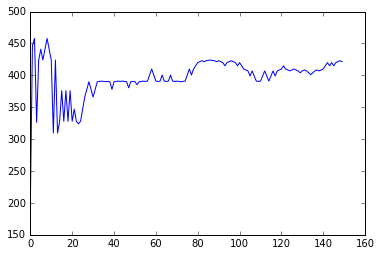

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [13]:
list(online_median(iter(l2)))[-1]

423

Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [14]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [15]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'generator'>


[999999999.9751294,
 999999999.9744452,
 999999999.9657383,
 999999999.9744452,
 999999999.9657383,
 999999999.9570312,
 999999999.9657383,
 999999999.9744452,
 999999999.9751294,
 999999999.9758135]

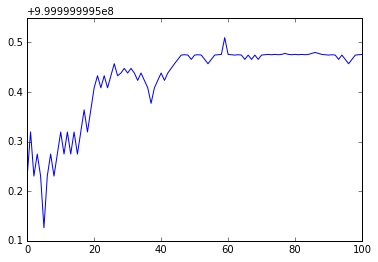

In [16]:
plt.plot(out)

## Q2

### Simulating a flight check-in counter

It is your job to simulate a flight-checkin counter. There are m agents handling n passengers. The passengers arrive in line with in-between time given by an exponential distribution for INTER_ARRIVAL_TIME. Each passenger, once he or she gets to a counter, is processed in a time drawn from an exponential distribution with PROCESSING_TIME. 

Clearly, in the usual case of 3-4 agents and 200+ customers on a flight, the customer waits much longer. We have been hired by the airlines customer-relations group to see how many extra agents must we hire to reduce waiting times by how much.

We start by representing each customer by a co-routine, which starts with the `inline` event. The state changes to the `atcounter` event, and then `ptime` seconds later, to the `leaves` event. Notice how this customer "process" is stopped at the yield, until the customer can be handled.

In [17]:
import collections, random
Event = collections.namedtuple('Event', 'time cid action agent')
def customer_process(idee, start, ptime):
    t, agent = yield Event(start, idee, "inline", None)
    t, agent = yield Event(t, idee, "atcounter", agent)
    yield Event(t+ptime, idee, "leaves", agent)


            

The following function simply implements the draw from the exponential distribution for a given customer:

In [18]:
def duration(arr_time, service_time):
    return random.expovariate(1./arr_time), random.expovariate(1./service_time)


Here is out main simulation class. you will be filling in parts of this class.

The constructor sets up the simulation. Three queues are created, one for agents that become free, one priority queue for events so that they can be processed in the order recieved, and a backlog for queue for those customers waiting in line because no agent was available.

We set up all the customers in the constructor, with two dictionaries, one to hold the co-routines, and one to hold time metadata which we shall use to figure the average waiting time.

The `run` method is where all the action happens and is the one you will edit.

In [19]:

import queue
import logging

class Simulator:
    
    def __init__(self, n_agents, n_customers, INTER_ARRIVAL_TIME =1., PROCESSING_TIME=3., DEBUG=False ): 
        
       
        #queues
        self.free_agents = queue.Queue()
        self.backlog = queue.Queue()
        self.events=queue.PriorityQueue()
        #save the arguments
        self.n_customers = n_customers
        self.n_agents = n_agents
        self.intertime=INTER_ARRIVAL_TIME
        self.proctime=PROCESSING_TIME
        #dictionaries to hold customer process
        self.customers={}
        self.customer_meta={}
        self.logger = logging.getLogger("sim")
        if DEBUG:
            self.logger.setLevel(logging.DEBUG)
            
        else:
            self.logger.setLevel(logging.WARNING)
        #on the free_agents queue, we put all the agents, and thee time
        #they got free
        for i in range(n_agents):
            self.free_agents.put((i,0))
        #this tracks when each customer came in.          
        time_when_came=0.
        for j in range(n_customers):
            interarrtime, proctime = duration(self.intertime, self.proctime)
            time_when_came += interarrtime
            intuple = (j, time_when_came, proctime)
            c = customer_process(*intuple)
            self.logger.debug("Customer {}, arrived {}, will take {} at counter".format(*intuple))
            #add each customer to dictionaries
            self.customers[j]=c
            self.customer_meta[j]={'cid':j, 'start':time_when_came, 'finish':None}
        self.logger.debug("========ending init==============\n\n")
        self.max_time_when_came=time_when_came  

    
    #Note: I changed the professor's code structure a little bit.
    #It works correctly.
    def run(self, end_time):
        #we prime each customer co-routine at the start
        #and put that event in the events priority queue
        #Since an event is a tuple, the ordering will be by start time
        for cid, proc in sorted(self.customers.items()):
            first_event = next(proc)#prime
            self.events.put(first_event)#customer in line

        #start at time 0
        sim_time = 0
        while sim_time < end_time:
            #we are done if no events and no backlog
            if self.events.empty() and self.backlog.empty(): 
                self.logger.debug('*** end of events and backlog***') 
                break
            #if we have agents available and a backlog
            #take customer from backlog queue. This is equivalent
            #to taking customers from line
            if not self.backlog.empty() and not self.free_agents.empty():
                "YOUR CODE HERE"
                #the sim time from this branch will be false
                #as we get the old time the person in the line showed up
                #you take the event out of backlog queue
                prev_time = sim_time #save the last event's sim_time as prev_time, this is the time we want to pass to next event
                current_event = self.backlog.get()
                sim_time, cid, action, _ = current_event #the action must be inline, agent:None, sim_time:the time when customer arrives
                next_time = prev_time
                #you should update the sim time and get the next event
                (agent,t) = self.free_agents.get()
                cproc = self.customers[cid]
                next_event = cproc.send((next_time, agent)) 
                self.events.put(next_event)
                
                
            else: #get current event in all other cases
                #his ensures that leave events are processed thus
                #freeing up agents
                "YOUR CODE HERE"
                call_next=1 #flag to indicate if we need to call the customer's coroutine or not
                current_event = self.events.get()
                sim_time, cid, action, agent = current_event
                cproc = self.customers[cid]
                #you take the event out of event priority queue
                #you do things based on the customer's action
                if action=='leaves':
                    self.logger.debug(">>>Customer {} leaves, agent {} free at {}".format(cid, agent, sim_time))
                    self.free_agents.put((agent, sim_time))#set the agent free
                    self.customer_meta[cid]['finish']=sim_time 
                    #you don't need specify next_time
                elif action=='atcounter':
                    self.logger.debug("Customer {} atcounter Agent {} at {}".format(cid, agent, sim_time))
                    next_time = sim_time#processing time already in coroutine  
                elif action=='inline':#the agent is None to start
                    self.logger.debug('----------------------------------------------')
                    self.logger.debug("Customer {}, arrived in line @ {}.".format(cid, sim_time))
                    if self.free_agents.empty():
                        self.logger.debug("NO agents available, putting {} inline on backlog at {}".format(cid, sim_time))
                        "YOUR CODE HERE"
                        self.backlog.put(Event(sim_time, cid, 'inline', None))
                        call_next=-1 # you should not call the customer's coroutine
                    else: 
                        self.logger.debug("{} agents available to serve.".format(self.free_agents.qsize()))
                        #get an agent from the free_agent queue
                        (agent,t) = self.free_agents.get()
                        #the status should from inline->atcounter
                        next_time = sim_time
                        
                if call_next==1:
                    
                    try:
                        next_event = cproc.send((next_time, agent)) 
                    except StopIteration:
                        del self.customers[cid] 
                    else:
                        self.events.put(next_event)
                    
                        
          
    def compute_ptimes(self):
        ptimes=[]
        for j in range(self.n_customers):
            #print(j,self.customer_meta[j] )
            if self.customer_meta[j]['finish']!=None:
                ptimes.append(self.customer_meta[j]['finish'] - self.customer_meta[j]['start'])
        return ptimes

In [20]:
def sim_main(num_agents, num_customers, extratime=20., seed=None, debug=False):
    if seed is not None:
        random.seed(seed)
    sim = Simulator(num_agents, num_customers, DEBUG=debug)
    sim.run(sim.max_time_when_came+extratime)
    return sim

Start small to test this out.

In [21]:
logger = logging.getLogger()
logger.addHandler(logging.StreamHandler())
sim=sim_main(2,6, debug=True)

Customer 0, arrived 0.5319795805130791, will take 1.680934224968598 at counter
Customer 1, arrived 1.2445503003201477, will take 1.8016545946201306 at counter
Customer 2, arrived 6.293510929553482, will take 4.3697323907642165 at counter
Customer 3, arrived 9.156770790210487, will take 3.300948926572565 at counter
Customer 4, arrived 9.385793278002465, will take 2.5925847525457417 at counter
Customer 5, arrived 11.727723911128365, will take 0.10253808436103372 at counter
========ending init==============


----------------------------------------------
Customer 0, arrived in line @ 0.5319795805130791.
2 agents available to serve.
Customer 0 atcounter Agent 0 at 0.5319795805130791
----------------------------------------------
Customer 1, arrived in line @ 1.2445503003201477.
1 agents available to serve.
Customer 1 atcounter Agent 1 at 1.2445503003201477
>>>Customer 0 leaves, agent 0 free at 2.2129138054816773
>>>Customer 1 leaves, agent 1 free at 3.0462048949402782
--------------------

Now lets try it with some larger numbers.

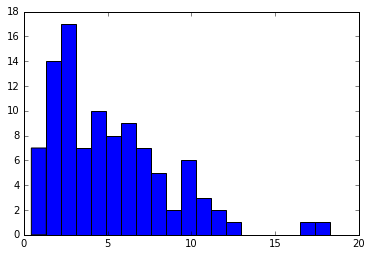

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
sim=sim_main(3,100)
plt.hist(sim.compute_ptimes(), bins=20);

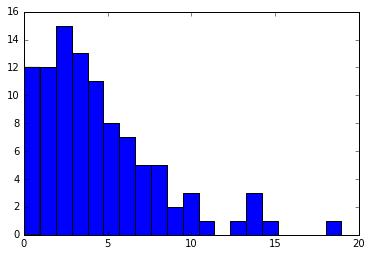

In [23]:
sim2=sim_main(4,100)
plt.hist(sim2.compute_ptimes(), bins=20);

extra time needed below as with 400 passengers a long time is taken to process.

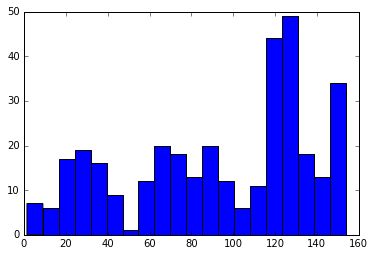

In [24]:
sim2=sim_main(2,400, extratime=100)
plt.hist(sim2.compute_ptimes(), bins=20);

For a proper statistical analysis, you would want to draw this multiple times and look at the distribution of the averages as well. But you should know what this distribution is :-).